## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

sns.set(rc = {'figure.figsize' : (8,6)})
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [2]:
data = pd.read_csv('titanic_data.csv')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


**Types of Features:**
- **Categorical** - Sex and Embarked
- **Continuous** - Age, Fare
- **Discrete** - SibSp , Parch
- **Alphanumeric** - Cabin

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Numerical value analysis

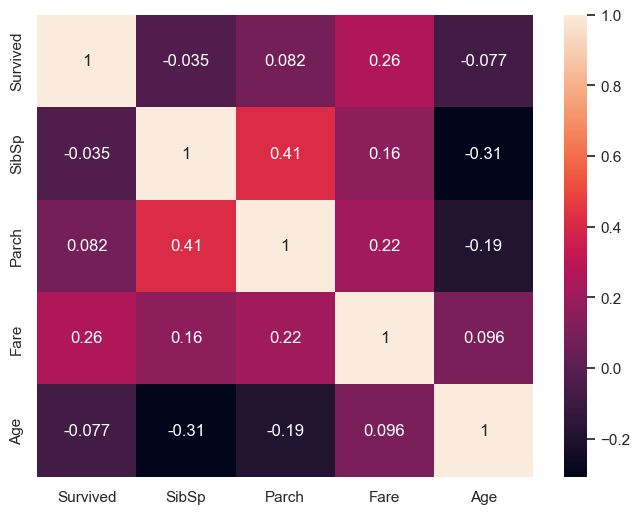

In [6]:
plt.figure(figsize = (8,6))
heatmap = sns.heatmap(data[['Survived', 'SibSp', 'Parch', 'Fare', 'Age']].corr(), annot = True)

## <font color = 'green'> SibSp - Number of Siblings / spouses aboard the Titanic </font>

In [7]:
data['SibSp'].nunique()

7

In [8]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

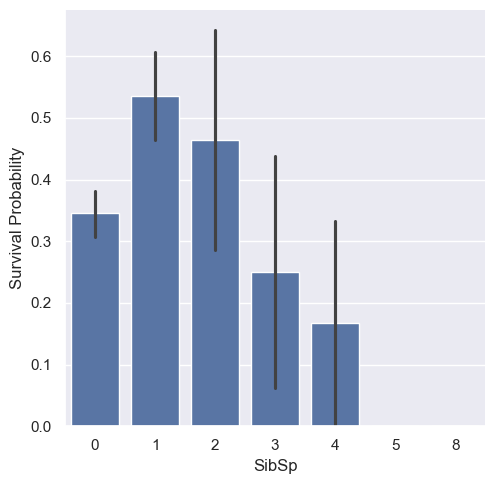

In [9]:
sns.catplot(x = "SibSp", y = "Survived",data = data, kind = "bar").set_ylabels('Survival Probability')

## <font color = 'green'>Age

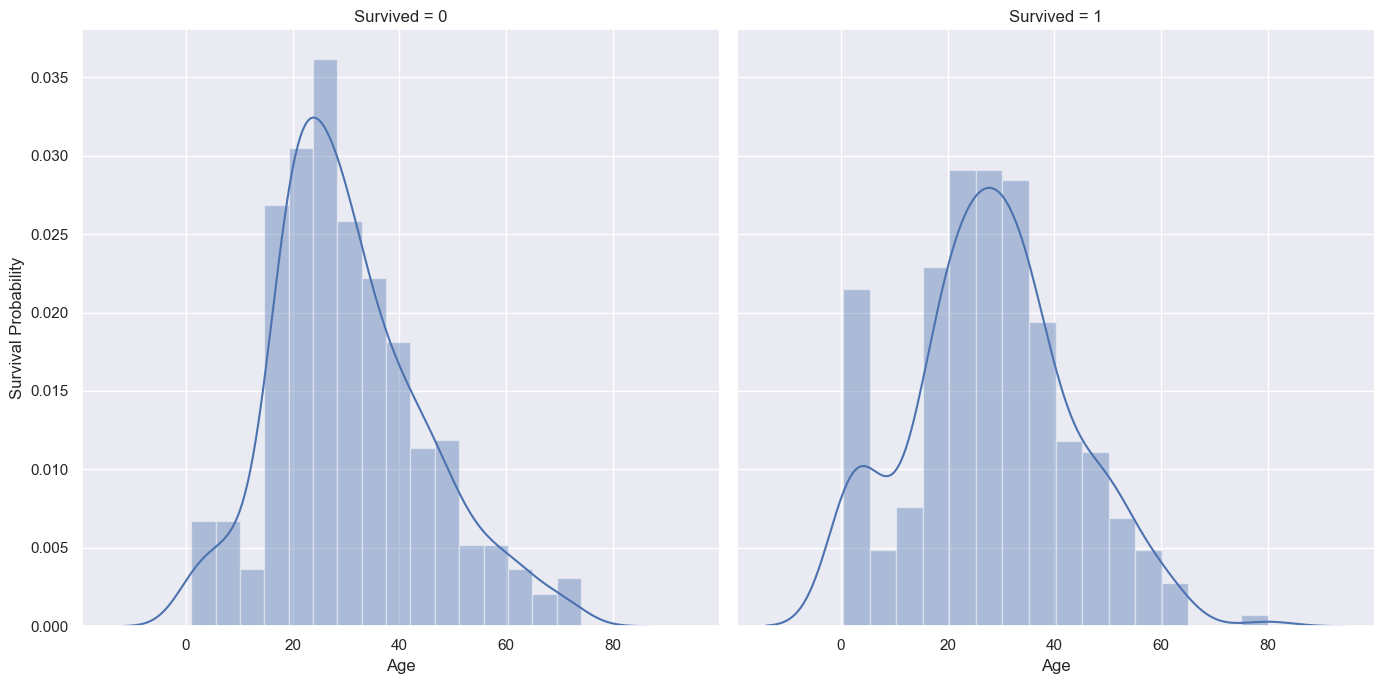

In [10]:
age_visual = sns.FacetGrid(data, col = "Survived",height=7)
age_visual = age_visual.map(sns.distplot,"Age").set_ylabels("Survival Probability")

## <font color = 'green'> Sex

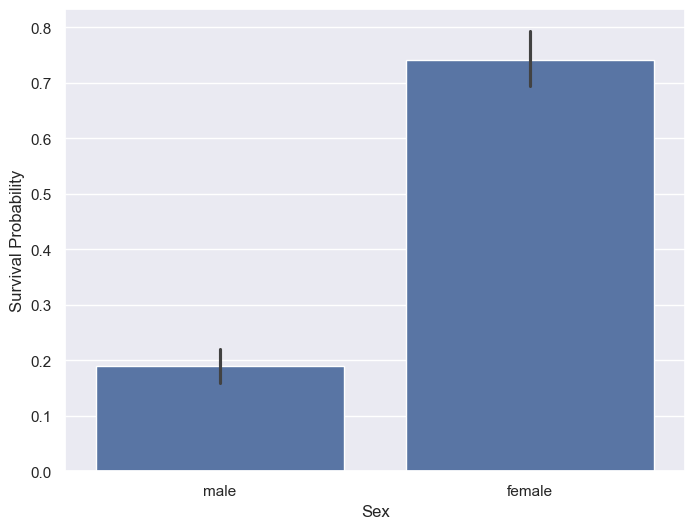

In [11]:
age_plot = sns.barplot(x = "Sex", y = "Survived", data = data).set_ylabel("Survival Probability")

In [12]:
data[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


## <font color=  'green'> PClass

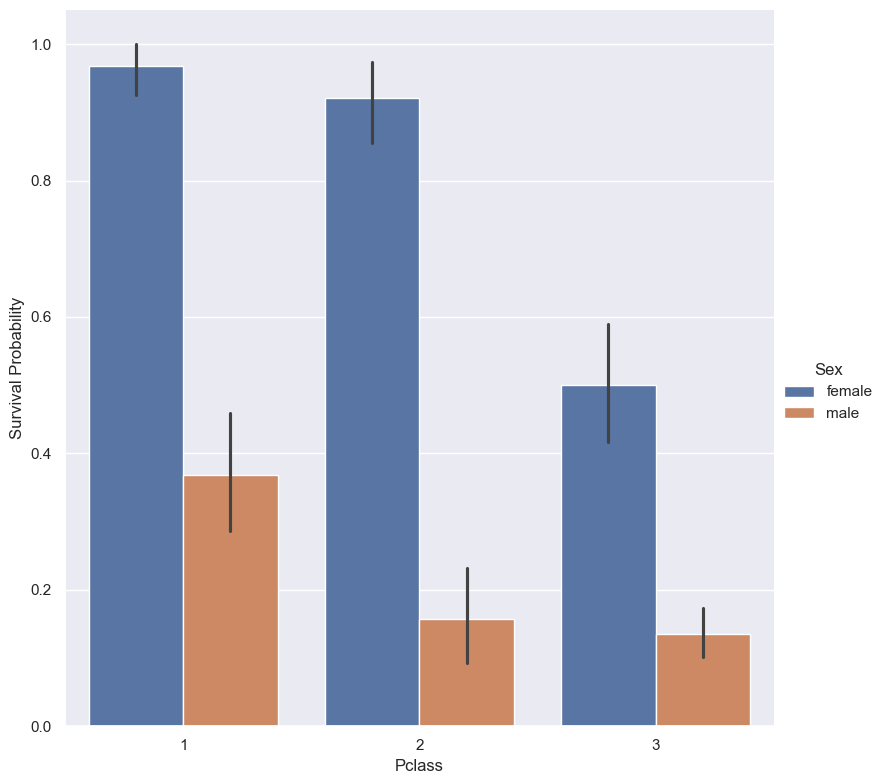

In [13]:
pclass = sns.catplot(x = "Pclass", y = "Survived",data = data, kind = "bar", height = 8, hue = 'Sex')
pclass = pclass.set_ylabels('Survival Probability')

## <font color=  'green'> Embarked

In [14]:
data['Embarked'].isnull().sum()

2

In [15]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [16]:
data['Embarked'] = data['Embarked'].fillna('S')

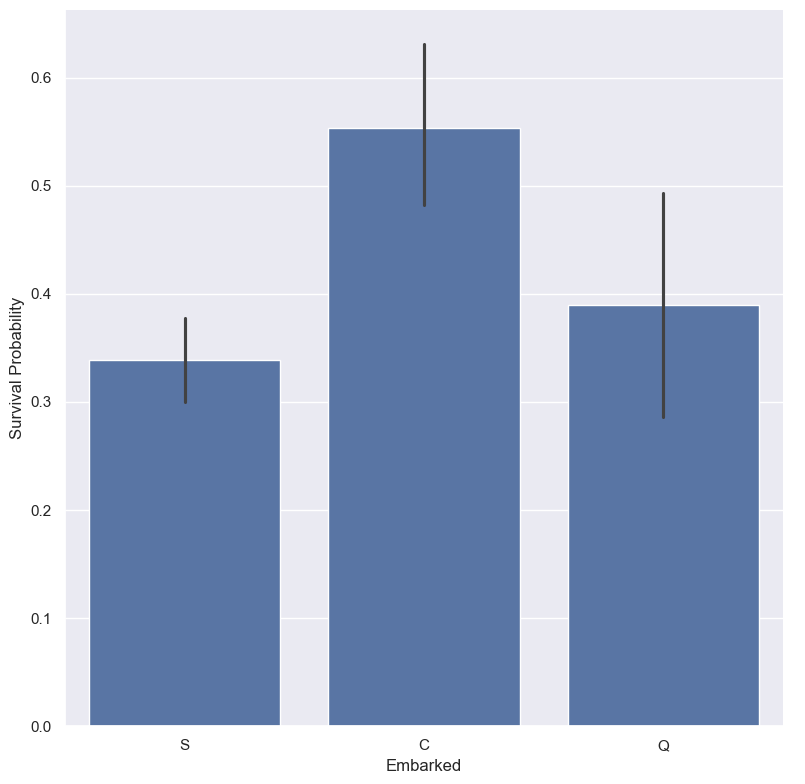

In [17]:
g = sns.catplot(x = "Embarked", y = "Survived",data = data, kind = "bar", height = 8)
g = g.set_ylabels('Survival Probability')

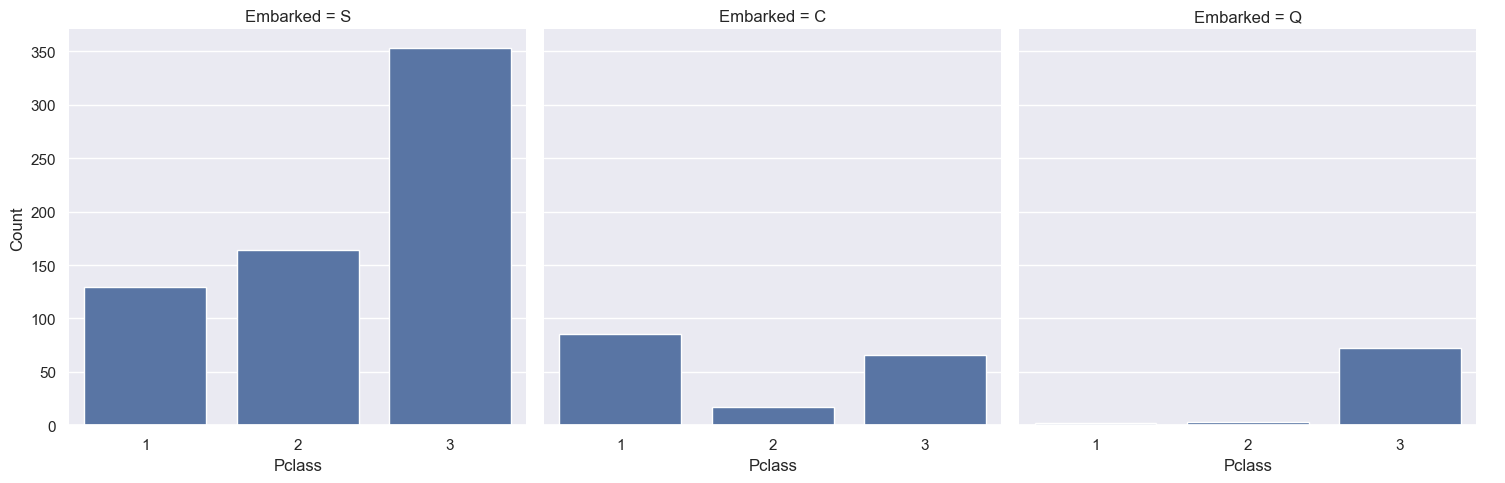

In [21]:
g = sns.catplot(x='Pclass', col='Embarked', data=data, kind='count')
g.despine(left=True)
g.set_ylabels('Count')

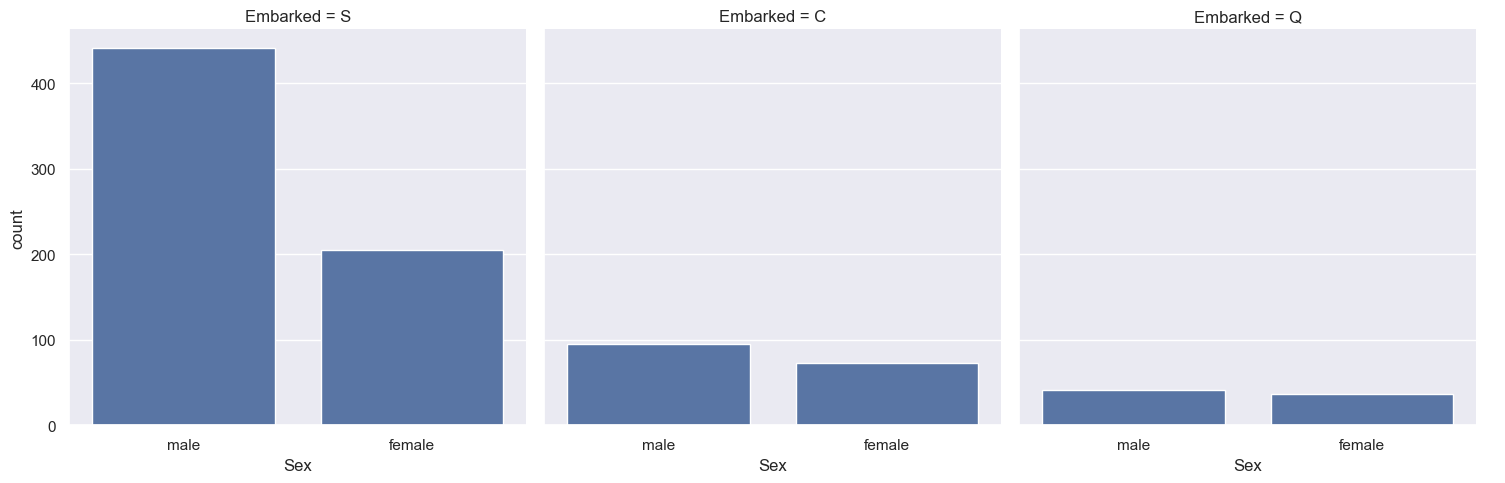

In [23]:
g = sns.catplot(x='Sex', col='Embarked', data=data, kind='count')

## Preparing data

In [55]:
data= pd.read_csv('titanic_data.csv')

In [56]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [58]:
mean = data['Age'].mean()
std = data['Age'].std()

is_null = data['Age'].isnull().sum()

In [59]:
print(mean, std, is_null)

29.69911764705882 14.526497332334044 177


In [60]:
rand_age = np.random.randint(mean-std,mean+std,size = is_null)

In [61]:
rand_age

array([25, 29, 37, 43, 39, 43, 42, 34, 26, 42, 25, 39, 22, 38, 36, 37, 42,
       21, 35, 33, 28, 34, 40, 21, 41, 35, 16, 36, 15, 36, 24, 38, 31, 24,
       17, 15, 34, 38, 37, 35, 25, 39, 15, 17, 24, 36, 20, 16, 28, 30, 18,
       23, 27, 36, 16, 31, 19, 25, 19, 43, 20, 37, 39, 20, 33, 43, 33, 35,
       30, 19, 30, 43, 16, 42, 24, 36, 38, 18, 22, 41, 28, 18, 39, 16, 34,
       41, 34, 33, 28, 19, 25, 20, 39, 32, 28, 19, 38, 16, 42, 43, 16, 19,
       25, 15, 25, 26, 33, 27, 21, 26, 28, 24, 42, 19, 22, 28, 29, 40, 31,
       28, 23, 37, 26, 41, 19, 38, 18, 40, 30, 35, 32, 16, 35, 26, 35, 19,
       23, 27, 32, 34, 38, 38, 24, 17, 40, 19, 22, 20, 24, 31, 25, 25, 16,
       35, 24, 32, 42, 31, 29, 25, 33, 29, 26, 23, 37, 20, 38, 36, 24, 38,
       37, 25, 30, 30, 37, 18, 16])

In [62]:
type(rand_age)

numpy.ndarray

In [63]:
a = data['Age'].copy()
a[np.isnan(a)] = rand_age
data['Age'] = a

In [64]:
data['Age'].isnull().sum()

0

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [66]:
data['Embarked'] = data['Embarked'].fillna('S')

In [67]:
col_to_drop = ['PassengerId', 'Cabin', 'Ticket', 'Name']
data.drop(col_to_drop,axis = 1,inplace = True)

In [68]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [69]:
genders = {"male":0, "female": 1}
data['Sex'] = data['Sex'].map(genders)

In [70]:
ports = {'S' : 0, 'C' : 1, 'Q' : 2}
data['Embarked'] = data['Embarked'].map(ports)

In [71]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


## Splitting the data

In [72]:
x = data.drop(data.columns[[0]], axis = 1)
y = data['Survived']

In [73]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.30,random_state = 0)

## Scaling

In [74]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

## Classification

In [78]:
logreg = LogisticRegression()
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier(5)
rf_classifier = RandomForestClassifier(n_estimators = 1000)

In [79]:
logreg.fit(xtrain,ytrain)
svc_classifier.fit(xtrain,ytrain)
dt_classifier.fit(xtrain,ytrain)
knn_classifier.fit(xtrain,ytrain)
rf_classifier.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=1000)

In [80]:
logreg_ypred = logreg.predict(xtest)
svc_classifier_ypred = svc_classifier.predict(xtest)
dt_classifier_ypred = dt_classifier.predict(xtest)
knn_classifier_ypred = knn_classifier.predict(xtest)
rf_classifier_ypred = rf_classifier.predict(xtest)

In [82]:
from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(ytest, logreg_ypred)
svc_classifier_acc = accuracy_score(ytest, svc_classifier_ypred)
dt_classifier_acc = accuracy_score(ytest, dt_classifier_ypred )
knn_classifier_acc = accuracy_score(ytest, knn_classifier_ypred)
rf_classifier_acc = accuracy_score(ytest, rf_classifier_ypred)

In [83]:
print("Logistic Regression : ", round(logreg_acc*100,2))
print("Support Vector : ", round(svc_classifier_acc*100,2))
print("Decision Tree : ", round(dt_classifier_acc*100,2))
print("K-NN classifier : ", round(knn_classifier_acc *100,2))
print("Random Forest : ", round(rf_classifier_acc*100,2))

Logistic Regression :  80.22
Support Vector :  81.72
Decision Tree :  75.0
K-NN classifier :  80.6
Random Forest :  82.09
